In [2]:
import numpy as np
import pandas as pd

In [3]:
path = ""#"D:\\github\\AML_HW1\\data\\"

In [4]:
eng_train = pd.read_csv(path + "train_eng.csv")
eng_test = pd.read_csv(path + "test_eng.csv")

In [5]:
eng_train.head()

,Name,Gender
0,Terrone,M
1,Annaley,F
2,Alajha,F
3,Efrem,M
4,Damus,M


In [10]:
eng_train_sorted = eng_train.sort_values("Name")

In [48]:
clean_train = eng_train_sorted.copy()
prev = None
for index, row in eng_train_sorted.iterrows():
    if str(type(prev)) == "<class 'NoneType'>":
        prev = row
        continue
    if row["Name"] == prev["Name"]:
        clean_train = clean_train.drop(clean_train[clean_train['Name'] == row["Name"]].index)
    prev = row
clean_train = clean_train.sort_index()

In [49]:
eng_train.shape

(83288, 2)

In [50]:
clean_train.shape

(70176, 2)

In [51]:
eng_test_sorted = eng_test.sort_values("Name")
clean_test = eng_test_sorted.copy()
# prev = eng_train_sorted.iterrows()[0]
prev = None
for index, row in eng_test_sorted.iterrows():
#     print(type(prev))
    if str(type(prev)) == "<class 'NoneType'>":
        prev = row
        continue
    if row["Name"] == prev["Name"]:
        clean_test = clean_test.drop(clean_test[clean_test['Name'] == row["Name"]].index)
    prev = row
clean_test = clean_test.sort_index()

In [52]:
eng_test.shape

(20822, 2)

In [53]:
clean_test.shape

(19996, 2)

In [55]:
unique = list(set("".join(clean_train["Name"])))
unique.sort()
vocab = dict(zip(unique, range(1,len(unique)+1)))

In [56]:
MAX_LEN = 15
def preproc(seq, voc, max_len = MAX_LEN):
    res = np.zeros(max_len)
    for i, ch in enumerate(seq):
        res[i] = voc[ch]
    return res

In [57]:
x_train = np.array([preproc(seq, vocab) for seq in clean_train["Name"]], dtype = np.int8)
x_test = np.array([preproc(seq, vocab) for seq in clean_test["Name"]], dtype = np.int8)

In [58]:
y_train = np.array([0 if g == 'F' else 1 for g in clean_train["Gender"]], dtype = np.int8)
y_test = np.array([0 if g == 'F' else 1 for g in clean_test["Gender"]], dtype = np.int8)

In [59]:
y_train[:10]

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int8)

In [60]:
x_train[:10]

array([[20, 31, 44, 44, 41, 40, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 40, 40, 27, 38, 31, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 38, 27, 36, 34, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5, 32, 44, 31, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4, 27, 39, 47, 45,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 38, 35, 39, 27, 46, 41, 47,  0,  0,  0,  0,  0,  0,  0],
       [10, 41, 34, 40, 45, 29, 41, 46, 46,  0,  0,  0,  0,  0,  0],
       [14, 41, 44, 38, 35, 45, 34, 35, 27,  0,  0,  0,  0,  0,  0],
       [11, 41, 38, 31, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [19, 29, 34, 44, 35, 46, 27,  0,  0,  0,  0,  0,  0,  0,  0]],
      dtype=int8)

In [61]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
print(f"Testing Accuracy:  {score:.4f}")

Testing Accuracy:  0.6343


In [63]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Model#1

In [120]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

embedding_dim = 5

model = Sequential()
model.add(layers.Embedding(input_dim=len(vocab) + 1, 
                           output_dim=embedding_dim, 
                           input_length=MAX_LEN))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(15, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=3e-4, l2=3e-3),
    bias_regularizer=regularizers.l2(3e-3)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 15, 5)             265       
_________________________________________________________________
flatten_16 (Flatten)         (None, 75)                0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 75)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 15)                1140      
_________________________________________________________________
dropout_28 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 16        
Total params: 1,421
Trainable params: 1,421
Non-trainable params: 0
___________________________________________________

In [121]:
history = model.fit(x_train, y_train,
                    epochs=80,
                    verbose=0,
                    validation_data=(x_test, y_test),
                    batch_size=128)

Training Accuracy:  0.8382
Testing Accuracy:  0.8013


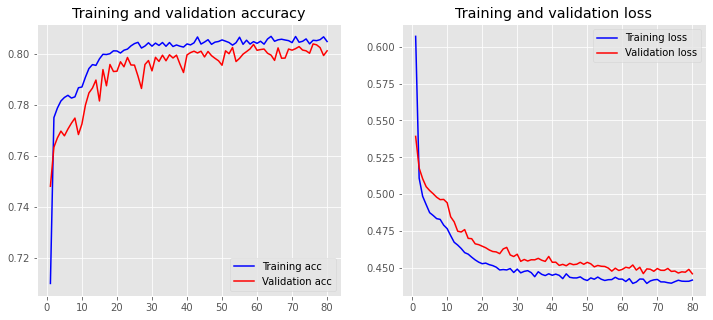

In [122]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print(f"Training Accuracy:  {accuracy:.4f}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print(f"Testing Accuracy:  {accuracy:.4f}")
plot_history(history)

Model#2 

In [123]:
model = Sequential()
model.add(layers.Embedding(input_dim=len(vocab) + 1, 
                           output_dim=embedding_dim, 
                           input_length=MAX_LEN))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=3e-4, l2=3e-3),
    bias_regularizer=regularizers.l2(3e-3)))
model.add(layers.Dropout(0.15))
model.add(layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=3e-4, l2=3e-3),
    bias_regularizer=regularizers.l2(3e-3)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 15, 5)             265       
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 5)                 0         
_________________________________________________________________
dense_47 (Dense)             (None, 30)                180       
_________________________________________________________________
dropout_29 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_30 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 1)               

In [124]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=0,
                    validation_data=(x_test, y_test),
                    batch_size=128)

Training Accuracy:  0.7144
Testing Accuracy:  0.6920


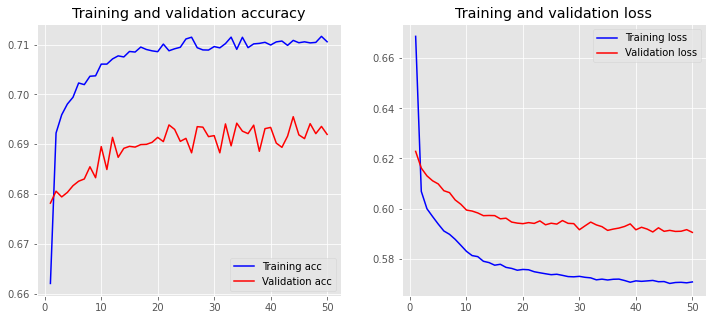

In [125]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print(f"Training Accuracy:  {accuracy:.4f}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print(f"Testing Accuracy:  {accuracy:.4f}")
plot_history(history)

RNN model

In [213]:
model = Sequential()
model.add(layers.Embedding(input_dim=len(vocab) + 1, 
                           output_dim=embedding_dim, 
                           input_length=MAX_LEN))
model.add(layers.LSTM(14, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=2e-4, l2=2e-4),
    bias_regularizer=regularizers.l2(2e-4)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=2e-4, l2=2e-4),
    bias_regularizer=regularizers.l2(2e-4)))
model.add(layers.Dropout(0.15))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate = 0.008),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_59 (Embedding)     (None, 15, 5)             265       
_________________________________________________________________
lstm_31 (LSTM)               (None, 14)                1120      
_________________________________________________________________
dropout_95 (Dropout)         (None, 14)                0         
_________________________________________________________________
dense_117 (Dense)            (None, 8)                 120       
_________________________________________________________________
dropout_96 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_118 (Dense)            (None, 1)                 9         
Total params: 1,514
Trainable params: 1,514
Non-trainable params: 0
___________________________________________________

In [214]:
history = model.fit(x_train, y_train,
                    epochs=85,
                    verbose=0,
                    validation_data=(x_test, y_test),
                    batch_size=128)

Training Accuracy:  0.8717
Testing Accuracy:  0.8211


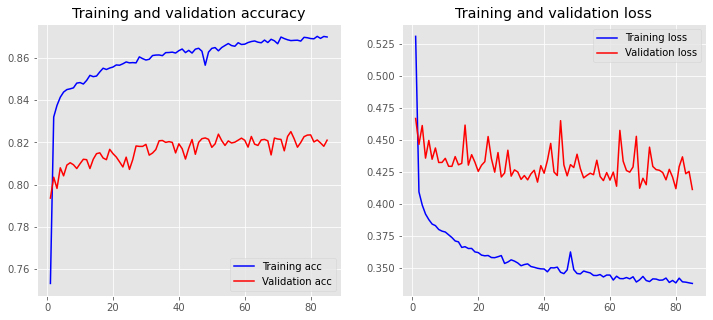

In [215]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print(f"Training Accuracy:  {accuracy:.4f}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print(f"Testing Accuracy:  {accuracy:.4f}")
plot_history(history)